# Kaggle Competition - Digit Recognizer

- Link- https://www.kaggle.com/c/digit-recognizer
- Model Accuracy Achieved- 98.7%

### Aims of this kernel session
- To define and use deep models using the Keras Sequential API.
- To examine the effect of batch normalisation and skip-forward connections on learning with deep networks.
- To examine the effect of dropout regularisation
- To explore the MNIST dataset and do some exploration of applying different architectures to the MNIST data

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps
%matplotlib inline

import tensorflow
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.python.keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Concatenate
from tensorflow.python.keras.optimizers import RMSprop # for optimisation
from tensorflow.python.keras.utils.np_utils import to_categorical # one-hot encoding

In [3]:
train_records = pd.read_csv("../input/train.csv")
test_records = pd.read_csv("../input/test.csv")

In [4]:
y_train = train_records["label"]
X_train = train_records.drop(labels = ["label"],axis = 1)
del train_records 

In [5]:
# we need to reshape the training data to have 4D, since we want each digit to be read as an image
# with only one colour channel
X_train = X_train.values.reshape(-1,28,28,1)
test_records = test_records.values.reshape(-1,28,28,1)
X_train.shape, test_records.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [6]:
def plot_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,18)):
    n_images = images_to_plot.shape[0]
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,0], cmap=cm.Greys ) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

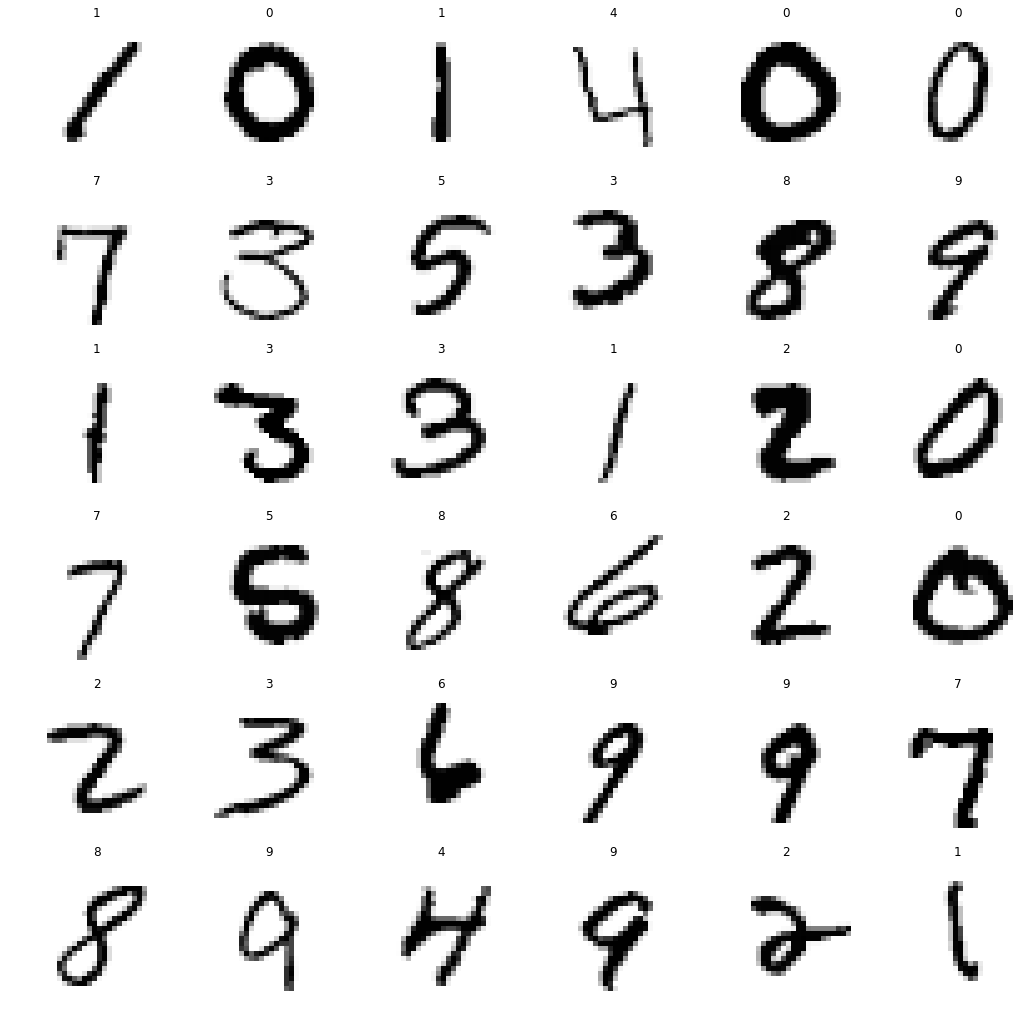

In [7]:
plot_images( X_train[:36,:,:,:], titles= y_train[:36])

Classifying these isn't easy: look how different the 6s are from each other, and the 3s.

In [8]:
# to use softmax, we need to alter the class representations from integers to 'one-hot' 
y_train = to_categorical(y_train)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

In [10]:
# This model is specified using the Keras Sequential API, which allows one to specify a network which is a 
# linear sequence of layers, the output of one being the input of the next
# Please look at the Keras documentation on the API

model_1=Sequential()
model_1.add(Conv2D(6,(3,3),padding='same',input_shape=(28,28,1)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(6,(3,3),padding='same'))  # A depth of only 6 convolutional filters here
model_1.add(Activation('relu'))
model_1.add(MaxPool2D(pool_size=(2,2),strides=None,padding='valid')) 
model_1.add(Dropout(0.25))
# you might want to try adding more convolutions and pooling here 
model_1.add(Flatten()) # reshapes the square array of the image into a vector
model_1.add(Dense(100)) # this is a pure linear transform
model_1.add(BatchNormalization())   
model_1.add(Activation('tanh'))     # Activation is a layer that applies a non-linearity to its inputs
model_1.add(Dense(100))
#model_1.add(BatchNormalization())
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
#model_1.add(BatchNormalization()) # we can drop BatchNormalization into or out of the model at will. 
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
model_1.add(BatchNormalization())
model_1.add(Activation('tanh'))
model_1.add(Dense(100))
#model_1.add(BatchNormalization())
model_1.add(Activation('tanh'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         330       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1176)              0         
__________

In [12]:
model_1.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history_1 = model_1.fit( X_train, y_train, epochs=30, batch_size=86, shuffle=True,
                       validation_data=(X_valid,y_valid))

Train on 37800 samples, validate on 4200 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
37800/37800 [==============================] - 20s 542us/sample - loss: 0.2654 - acc: 0.9193 - val_loss: 0.1066 - val_acc: 0.9690
Epoch 2/30
37800/37800 [==============================] - 20s 519us/sample - loss: 0.1138 - acc: 0.9655 - val_loss: 0.1178 - val_acc: 0.9655
Epoch 3/30
37800/37800 [==============================] - 20s 519us/sample - loss: 0.0888 - acc: 0.9722 - val_loss: 0.0766 - val_acc: 0.9786
Epoch 4/30
37800/37800 [==============================] - 20s 522us/sample - loss: 0.0759 - acc: 0.9761 - val_loss: 0.0557 - val_acc: 0.9850
Epoch 5/30
37800/37800 [==============================] - 20s 520us/sample - loss: 0.0622 - acc: 0.9801 - val_loss: 0.0756 - val_acc: 0.9779
Epoch 6/30
37800/37800 [==============================] - 20s 519us/sample - loss: 0.0585 - acc: 0.9810 - val_loss: 0.0709 - val_acc: 0.9805
Epoch 7/30
37800/37800 [==============================] -

In [14]:
valid_predictions = model_1.predict( X_valid )
valid_predicted_classes = np.argmax(valid_predictions, axis=1)
valid_predicted_classes.shape
y_valid_classes = np.argmax(y_valid,axis=1)

In [15]:
valid_prediction_errors = np.not_equal( valid_predicted_classes, y_valid_classes )

In [16]:
np.sum( valid_prediction_errors)
# around 2% error rate

56

In [17]:
# lets look at the image that were wrongly classified
error_images = X_valid[ valid_prediction_errors, :, : , :]

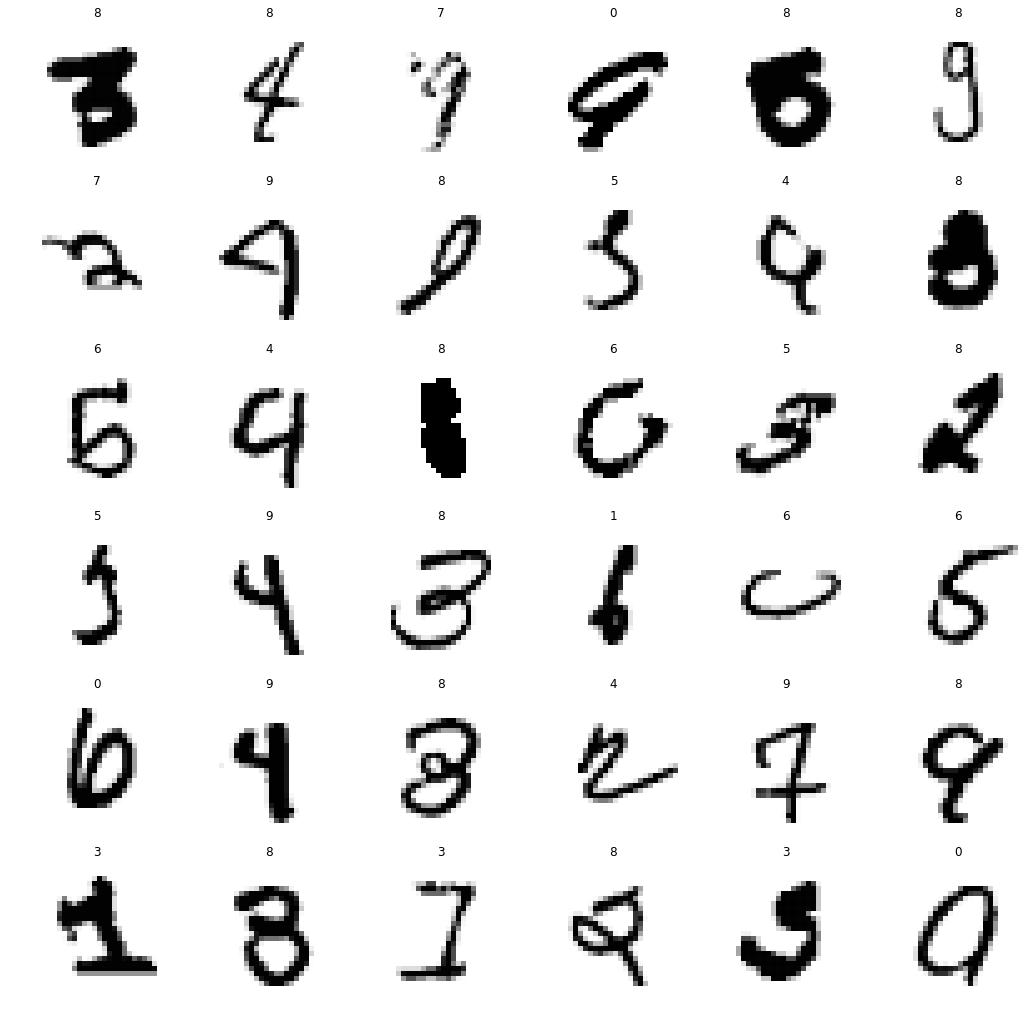

In [18]:
#  the images with the (wrong) predicted classification
plot_images( error_images[:36,:,:,:], valid_predicted_classes[valid_prediction_errors])

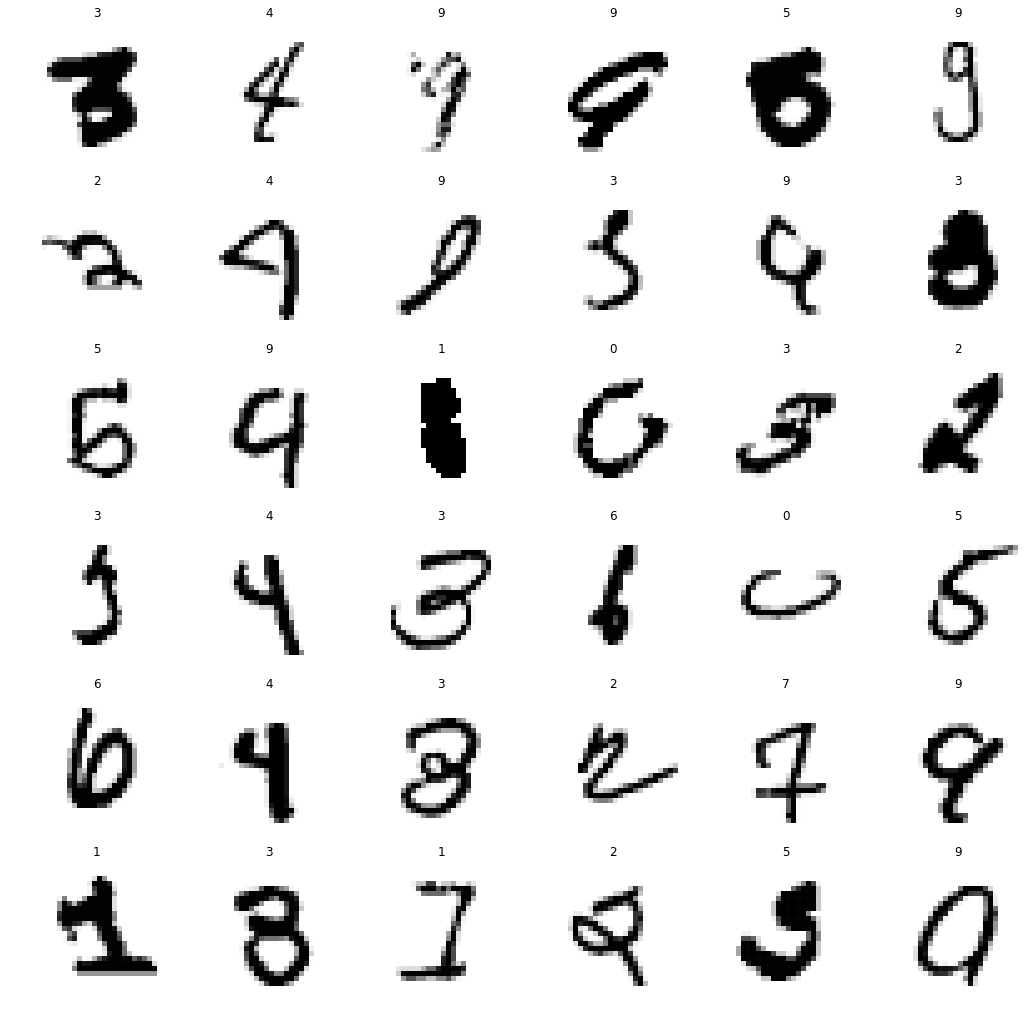

In [19]:
#  the images with the true classification
plot_images( error_images[:36,:,:,:], y_valid_classes[valid_prediction_errors])

In [20]:
# predicion on test set
predictions = model_1.predict( test_records )

In [21]:
print(predictions[:3])
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes[:3]

[[1.0161124e-07 4.7999560e-09 9.9998868e-01 2.2633194e-06 1.1473527e-07
  2.1853832e-07 3.1717679e-08 2.6861619e-08 8.0276468e-06 5.3235254e-07]
 [9.9999452e-01 4.5295367e-09 8.2255571e-07 9.2688722e-08 1.3191702e-07
  8.1530419e-07 2.3421865e-06 6.1228191e-09 8.3473009e-07 3.9745251e-07]
 [6.4259348e-07 1.0114346e-07 7.5122816e-06 1.4112663e-05 1.4161434e-04
  1.0649799e-07 1.1104301e-08 7.0011441e-07 6.8011228e-05 9.9976712e-01]]


array([2, 0, 9])

In [22]:
predicted_classes = pd.Series(predicted_classes,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predicted_classes],axis = 1)
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
5            6      7
6            7      0
7            8      3
8            9      0
9           10      3
10          11      5
11          12      7
12          13      4
13          14      0
14          15      4
15          16      3
16          17      3
17          18      1
18          19      9
19          20      0
20          21      9
21          22      1
22          23      1
23          24      5
24          25      7
25          26      4
26          27      2
27          28      7
28          29      4
29          30      7
...        ...    ...
27970    27971      5
27971    27972      0
27972    27973      4
27973    27974      8
27974    27975      0
27975    27976      3
27976    27977      6
27977    27978      0
27978    27979      1
27979    27980      9
27980    27981      3
27981    27982      1
27982    27983      1
27983    2

In [23]:
submission.to_csv("submission.csv",index=False)